## Logistic Regression with Regularization
<p> Based on Andrew Ng's lecture on Stanford Machine Learning</p>
<p> A dataset has grades of students for 2 exams (exam-1 and exam-2) and is used to predict if the student can be admitted or not in the university.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [240]:
# importing dataset
df = pd.read_csv('data/ex2data1.csv')
df.head()

,grade1,grade2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [282]:
# extracting the training data to save into arrays
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2:3].values

Text(0, 0.5, 'Grades for Exam-2')

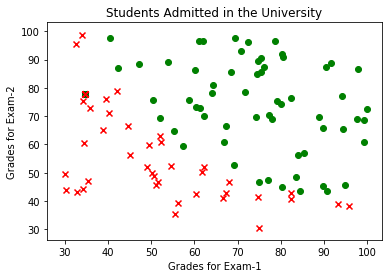

In [243]:
# plotting the training examples
# find indeces for positive and negative examples
pos = np.where(y == 1)
neg = np.where(y == 0)

plt.scatter(X[pos, 0], X[pos, 1], color='green', marker='o')
plt.scatter(X[neg, 0], X[neg, 1], color='red', marker='x')
plt.title('Students Admitted in the University')
plt.xlabel('Grades for Exam-1')
plt.ylabel('Grades for Exam-2')

In [285]:
# normalize the training data
def featureNormalize(X):
    num_features = X.shape[1]
    num_examples = X.shape[0]
    X_norm = np.zeros((num_examples, num_features))
    mu = np.zeros((1, num_features))
    sigma = np.zeros((1, num_features))
    
    # calculate per feature
    for j in range(num_features):
        mu[0,j] = np.mean(X[:, j])
        sigma[0,j] = np.std(X[:, j])
        
        for i in range(num_examples):
            X_norm[i, j] = (X[i, j] - mu[0,j]) / sigma[0, j]
                     
    return X_norm, mu, sigma

In [294]:
X_norm, mu, sigma = featureNormalize(X)

In [287]:
# setting up the data matrix: m = no. of training examples, n = no. of features
m = X.shape[0]

# adding 1's to X
X_train = np.concatenate((np.ones((m, 1)), X_norm), axis=1)


In [288]:
# sigmoid function
import math
def sigmoid(z):
    g = 1 / (1 + math.e**(-z))
    return g

In [289]:
# fuction to calculate cost function (J) and gradient
def costFunction(X, y, theta, reg_lambda=0):
    m = X.shape[0]
    z = X.dot(theta)
    h = sigmoid(z)
    J = -(1/m)*np.sum(y*(np.log(h)) + (1 - y)*(np.log(1 - h))) + np.sum((reg_lambda/(2*m))*(theta[1:]**2))
    return J

In [290]:
def gradientDescent(X, y, theta, alpha, num_iters, reg_lambda=0):
    m = X.shape[0]
    J_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        z = X.dot(theta)
        h = sigmoid(z)
        theta_new = np.concatenate((np.zeros((1,1)), theta[1:]),axis=0)
        gradients = alpha*(1/m)*(X.T).dot(h - y) + (reg_lambda/m)*theta_new          
        theta = theta - gradients   
        J_history[i] = costFunction(X, y, theta, reg_lambda)
    return theta, J_history 

In [316]:
# initial value of theta
n = X_train.shape[1]
initial_theta = np.zeros((n, 1))

# learning rate, number of iterations and lambda
alpha = 0.01
num_iters = 20
reg_lambda = 0

# calculate cost function and gradient descent
[theta, J_history] = gradientDescent(X_train, y, initial_theta, alpha, num_iters, reg_lambda)

print('Minimum theta:\n', theta)
print('Cost function, J:', J_history[num_iters-1])


Minimum theta:
 [[0.01953233]
 [0.05495785]
 [0.049054  ]]
Cost function, J: [0.66413602]


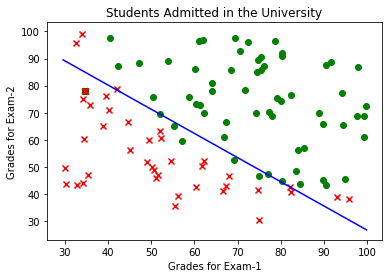

In [324]:
# plotting the training examples
# find indeces for positive and negative examples
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], color='green', marker='o')
plt.scatter(X[neg, 0], X[neg, 1], color='red', marker='x')
plt.title('Students Admitted in the University')
plt.xlabel('Grades for Exam-1')
plt.ylabel('Grades for Exam-2')

# plotting the decision boundary
xp = np.array([[min(X[:, 1])-1, max(X[:, 1])+1]]).T
yp = (1/theta[1])*(theta[2]*xp + theta[0])
temp0 = yp[0,0]
temp1 = yp[1,0]
ynew = np.array([[temp1], [temp0]])
plt.plot(xp, ynew, color='blue')

In [311]:
# predicting the probability
def predict(X, theta):
    m = X.shape[0]
    p = np.zeros((m,1))
    z = X.dot(theta)
    probability = sigmoid(z)
    for i in range(m):
        if (probability[i] >= 0.5):
            p[i,0] = 1.0
        else:
            p[i,0] = 0.0
    return p
                
p = predict(X_train, theta) 
p.ravel()

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.])

### Using scikit-Learn

In [297]:
# adding 1's to X
X_sci = np.concatenate((np.ones((m, 1)), X), axis=1)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_sci, y.reshape(m))
logmodel.coef_

array([[-2.85831439,  0.05214733,  0.04531467]])

In [260]:
# predict values for the testing data
predictions = logmodel.predict(X_sci)
#print(predictions)
predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [261]:
# create classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y, predictions))
print(confusion_matrix(y, predictions))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88        40
           1       0.88      0.98      0.93        60

    accuracy                           0.91       100
   macro avg       0.93      0.89      0.90       100
weighted avg       0.92      0.91      0.91       100

[[32  8]
 [ 1 59]]
